# Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
test1=pd.read_csv("C:\\Users\\Ayushi Asthana\\Desktop\\vidooly\\ad_org_test.csv")
train1=pd.read_csv("C:\\Users\\Ayushi Asthana\\Desktop\\vidooly\\ad_org_train.csv")

In [3]:
train1.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


## Preprocessing Data

In [4]:
train1.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [5]:
train1=train1[train1.views!='F']
train1=train1[train1.likes!='F']
train1=train1[train1.dislikes!='F']
train1=train1[train1.comment!='F']

Converting to numeric datatype

In [6]:
train1.views=pd.to_numeric(train1.iloc[:,2])
train1.likes=pd.to_numeric(train1.iloc[:,3])
train1.dislikes=pd.to_numeric(train1.iloc[:,4])
train1.comment=pd.to_numeric(train1.iloc[:,5])
train1.adview=pd.to_numeric(train1.iloc[:,1])

## Encoding categorical features

In [7]:
from sklearn.preprocessing import LabelEncoder
train1['category'] = LabelEncoder().fit_transform(train1['category'])
train1['duration']=LabelEncoder().fit_transform(train1['duration'])
train1['vidid']=LabelEncoder().fit_transform(train1['vidid'])



Encoding published feature

In [8]:
train1['published']=LabelEncoder().fit_transform(train1['published'])

In [9]:
target1data  = pd.DataFrame(data = train1.iloc[:, 1].values, columns = ['target'])

In [10]:
target1data.head()

,target
0,40
1,2
2,1
3,6
4,1


In [11]:
train1data=train1.drop(['adview'], axis=1)

In [12]:
train1data=train1.drop(['adview'], axis=1)


# Plotting the correlation heatmap

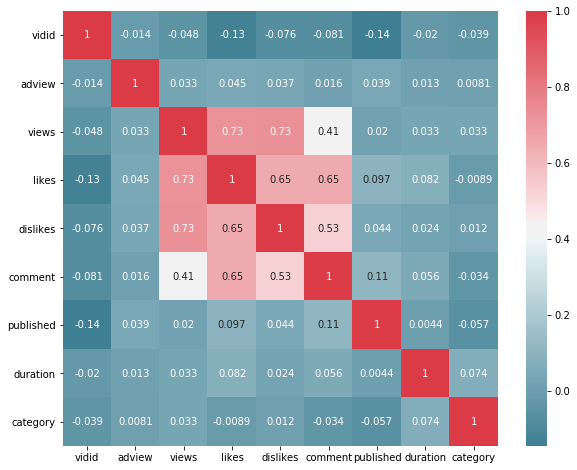

In [13]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

So adviews are most correlated to likes.

# Visualizations

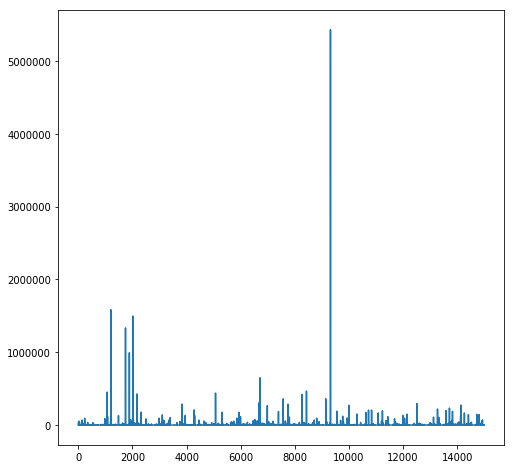

In [15]:
plt.figure(figsize=(8,8))
plt.plot(train1['adview'], label='Adviews')
plt.show()

In [16]:
train1.shape
    

(14637, 9)

As we can see very less videos have adviews greater than 2000000 so we will remove these rows.

In [17]:
train1 = train1[train1['adview']<2000000]

In [18]:
train1.shape

(14636, 9)

## Applying machine learning models

### Applying logistic regression

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(train1data,target1data, test_size=0.4, 
                                                    random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  


Coefficients: 
 [[  5.26757894e-02  -2.77305720e-04   2.96300944e-01   2.52962293e+00
   -1.94037055e+00   3.96925478e+00   8.92514949e-01   5.15116625e+02]]
Variance score: 0.0005502706823425907


In [22]:
y_pred=reg.predict(X_test)

Let's Evaluate our model

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4877.26286912
Mean Squared Error: 1088483107.88
Root Mean Squared Error: 32992.1673717


Linear Regression is a very bad model!!!! for this problem

# Random Forest regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2

In [26]:
clf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)


In [27]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\Ayushi Asthana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))





Mean Absolute Error: 4097.26704765
Mean Squared Error: 2098315456.12
Root Mean Squared Error: 45807.3733816


Encoding test features

In [29]:
test1.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [30]:
test1=test1[test1.views!='F']
test1=test1[test1.likes!='F']
test1=test1[test1.dislikes!='F']
test1=test1[test1.comment!='F']

In [31]:
from sklearn.preprocessing import LabelEncoder
k=test1['vidid']
test1['category'] = LabelEncoder().fit_transform(test1['category'])
test1['duration']=LabelEncoder().fit_transform(test1['duration'])
test1['vidid']=LabelEncoder().fit_transform(test1['vidid'])
test1['published']=LabelEncoder().fit_transform(test1['published'])


In [32]:
test1.views=pd.to_numeric(test1.iloc[:,2])
test1.likes=pd.to_numeric(test1.iloc[:,3])
test1.dislikes=pd.to_numeric(test1.iloc[:,4])
test1.comment=pd.to_numeric(test1.iloc[:,5])


In [33]:
test1.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,6153,218,1377,2053,2053,2115,1
1,3444,8171,340,1047,1825,1825,2055,5
2,1593,31,11,1,1009,1009,1506,3
3,3775,2284,250,274,116,116,2265,6
4,7644,2519,225,116,1892,1892,1625,1


In [34]:
test2=pd.read_csv("C:\\Users\\Ayushi Asthana\\Desktop\\vidooly\\ad_org_test.csv")
#print(len(pred_forest))
test_features = test1[["vidid", "likes", "dislikes", "published", "category","duration","comment","views"]].values
pred_forest = clf.predict(test_features)
k1=pred_forest.astype('int')
#print(k1)

submission = pd.DataFrame({
        "vidid": k,
        "adview": k1
    })
submission.to_csv('C:\\Users\\Ayushi Asthana\\Desktop\\vidooly\\ad_org_submission.csv', index=False)

# Support Vector Regression

In [35]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\Ayushi Asthana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  



Root Mean Squared Error: 33060.8741468
Mean Absolute Error: 1985.5870778
Mean Squared Error: 1093021399.35


So SVR is the best among these three ML models.

In [38]:
test2=pd.read_csv("C:\\Users\\Ayushi Asthana\\Desktop\\vidooly\\ad_org_test.csv")
#print(len(pred_forest))
test_features = test1[["vidid", "likes", "dislikes", "published", "category","duration","comment","views"]].values
pred_forest = clf.predict(test_features)
k1=pred_forest.astype('int')
#print(k1)

submission = pd.DataFrame({
        "vidid": k,
        "adview": k1
    })
submission.to_csv('C:\\Users\\Ayushi Asthana\\Desktop\\vidooly\\ad_org_submissionSVR.csv', index=False)